In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#### Visualise the data

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image=x_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
single_image.shape

(28, 28)

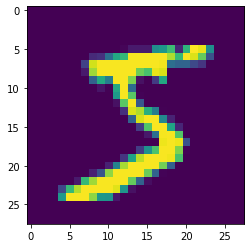

In [9]:
plt.imshow(single_image)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
## Here these are categories and not numbers

#### Needs one hot encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test=to_categorical(y_test)

In [18]:
y_cat_train = to_categorical(y_train)

In [21]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [22]:
single_image.max()

255

In [23]:
single_image.min()

0

#### Normalising

In [24]:
x_train = x_train/255

In [25]:
x_test = x_test/25

In [26]:
scaled_image = x_train[0]

In [27]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

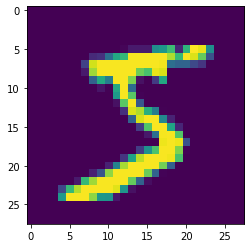

In [28]:
plt.imshow(scaled_image)

In [29]:
x_train.shape

(60000, 28, 28)

#### Needs one more dimension to let the network know we are interested in single RGB channel

In [30]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [31]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [56]:
model = Sequential()
# Convolution Layer
model.add(Conv2D(filters=32,activation='relu', input_shape=(28,28,1), kernel_size=(4,4)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten imgaes from 28 by 28 to 764 before final layer
model.add(Flatten())

#128 neurons in dense layer
model.add(Dense(128, activation='relu'))

# Last layer is the classifier, thus 10 possible cases
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])




In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               589952    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

### Training the model

In [60]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1366 - accuracy: 0.9597 - val_loss: 0.6068 - val_accuracy: 0.9726
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.6375 - val_accuracy: 0.9716
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.6450 - val_accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.7744 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 1.9513 - val_accuracy: 0.9438


### Evaluation of the model

In [61]:
metrics = pd.DataFrame(model.history.history)

In [62]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136581,0.959733,0.606808,0.9726
1,0.048274,0.985083,0.637516,0.9716
2,0.029778,0.990250,0.645017,0.9761
3,0.021179,0.993333,0.774388,0.9733
4,0.014134,0.995500,1.951323,0.9438


<AxesSubplot:>

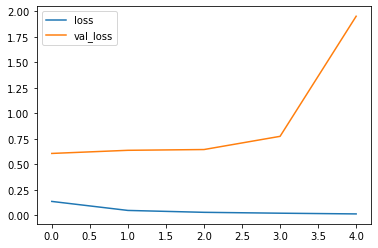

In [63]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

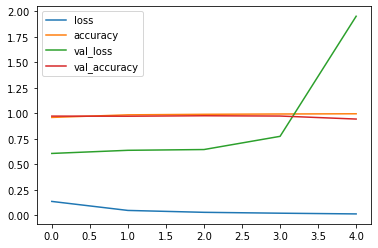

In [64]:
metrics.plot()

<AxesSubplot:>

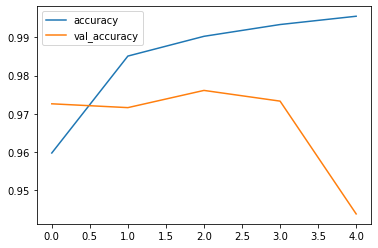

In [65]:
metrics[['accuracy','val_accuracy']].plot()

In [66]:
model.metrics_names

['loss', 'accuracy']

In [67]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.9513232707977295, 0.9437999725341797]

### Classification report and confusion matrix

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
preds_prob=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [104]:
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.6006147e-20, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [108]:
preds_prob

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.6006147e-20, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [109]:
predictions = np.argmax(preds_prob, axis=1)

In [112]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.97      0.98      1135
           2       0.99      0.95      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       1.00      0.84      0.91       892
           6       0.98      0.98      0.98       958
           7       1.00      0.93      0.96      1028
           8       0.68      1.00      0.81       974
           9       0.99      0.83      0.90      1009

    accuracy                           0.94     10000
   macro avg       0.96      0.94      0.95     10000
weighted avg       0.96      0.94      0.95     10000



In [114]:
confusion_matrix(y_test,predictions)

array([[ 961,    0,    1,    0,    0,    0,    0,    0,   17,    1],
       [   0, 1103,    1,    0,    1,    0,    4,    0,   26,    0],
       [   0,    1,  976,    2,    1,    0,    2,    1,   49,    0],
       [   0,    0,    2,  988,    0,    0,    0,    0,   20,    0],
       [   0,    0,    0,    0,  956,    0,    2,    0,   23,    1],
       [   3,    0,    0,   35,    0,  751,   10,    0,   90,    3],
       [   5,    1,    1,    0,    1,    0,  937,    0,   13,    0],
       [   0,    1,    6,    3,    4,    0,    0,  957,   50,    7],
       [   1,    0,    0,    0,    0,    0,    0,    0,  973,    0],
       [   0,    0,    0,    2,    4,    0,    0,    0,  167,  836]],
      dtype=int64)

In [115]:
import seaborn as sns

<AxesSubplot:>

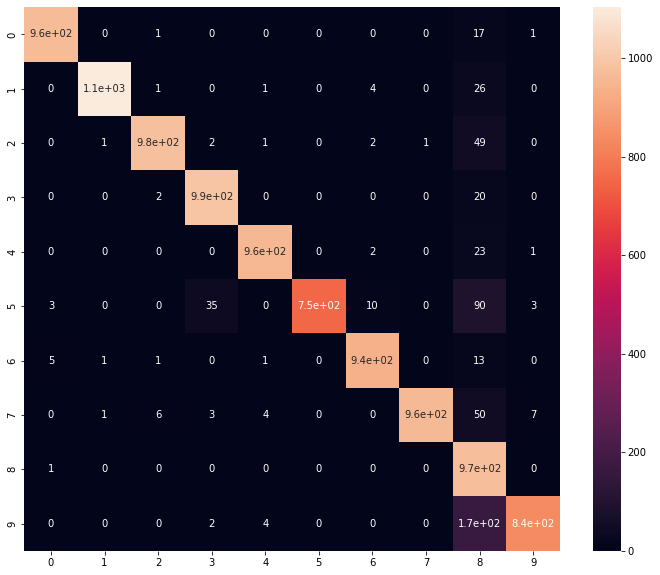

In [118]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


### Test the predictions

In [119]:
my_number=x_test[0]

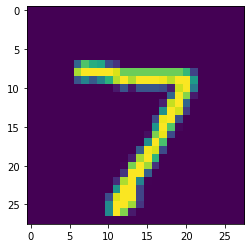

In [123]:
plt.imshow(my_number.reshape(28,28))

In [127]:
# reshape with num_images,width, height,color_channels
my_prediction=model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 14ms/step


In [128]:
predicted = np.argmax(my_prediction, axis=1)

In [130]:
predicted

array([7], dtype=int64)